# EDA: Credit card fraud detection

This notebook conducts an exploratory data analysis on the Kaggle credit card fraud dataset. The goal is to move beyond visualization and develop a strategic understanding of the dataset, in order to set the foundations for the preprocessing and modelling part. We will investigate feature distributions, identify key predictive signals, and formulate data-driven hypotheses that will directly inform our subsequent modeling approach. The central challenge is the extreme class imbalance, which will guide every step of our analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('data/creditcard.csv')

#First inspection of the data

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


First, a quick check of the structure and statistics will tell us what we need to know before diving deeper.

In [2]:
# Display general information and descriptive statistics
print("DataFrame Information")
df.info()
print("\n" + "="*50 + "\n")
print("Descriptive Statistics")
df.describe()

DataFrame Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  f

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Key takeaways from the initial check:

Data Quality: The data is pristine. With 284,807 non-null entries across all columns, we have no missing values to handle. We can jump straight into analysis.

Data Types: All features are numeric, which means no categorical encoding is needed.

Feature Scaling:
The V1-V28 features are already scaled (mean near to 0), confirming they are PCA components.
Crucially, Time and Amount are raw and unscaled. They must be scaled before modeling to prevent their magnitude from dominating the learning process.

The most defining characteristic of this dataset is its severe class imbalance, let's quantify it

Class Counts:
Class
0    284315
1       492
Name: count, dtype: int64

Class Proportions:
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


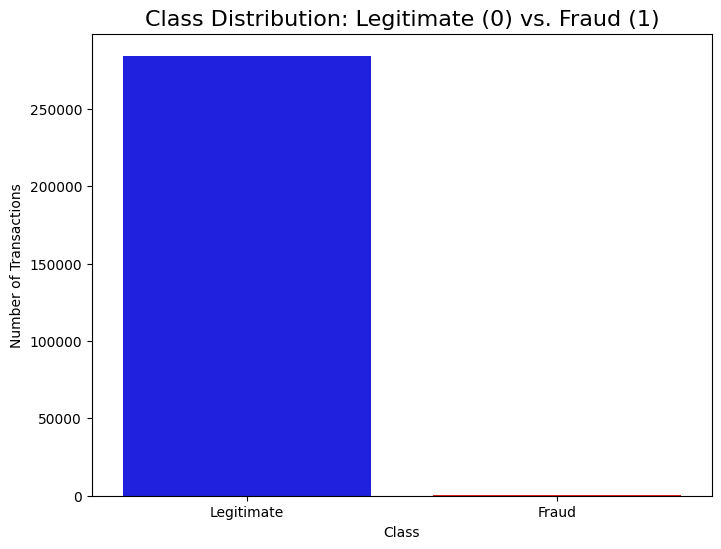

In [3]:
# Quantify the imbalance
class_counts = df['Class'].value_counts()
class_proportions = df['Class'].value_counts(normalize=True)

print("Class Counts:")
print(class_counts)
print("\nClass Proportions:")
print(class_proportions)

# Visualize the imbalance
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df, palette=['blue', 'red'])
plt.title('Class Distribution: Legitimate (0) vs. Fraud (1)', fontsize=16)
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Legitimate', 'Fraud'])
plt.show()

This is a classic "needle in a haystack" problem, with fraudulent transactions making up just 0.173% of the data.

This immediately tells us that accuracy is a useless metric. A naive model predicting "not fraud" every time would be 99.83% accurate but completely worthless.

Our strategy must be built around this imbalance. We will focus on metrics like the Precision-Recall AUC (AUPRC) and use techniques like class weighting (scale_pos_weight in XGBoost) during training.

With our initial checks complete, let's dive into the features, starting with the non-anonymous ones.

The Amount feature is heavily skewed, which hides its underlying patterns. A log transformation is the standard way to deal with this and will help us understand the situation.

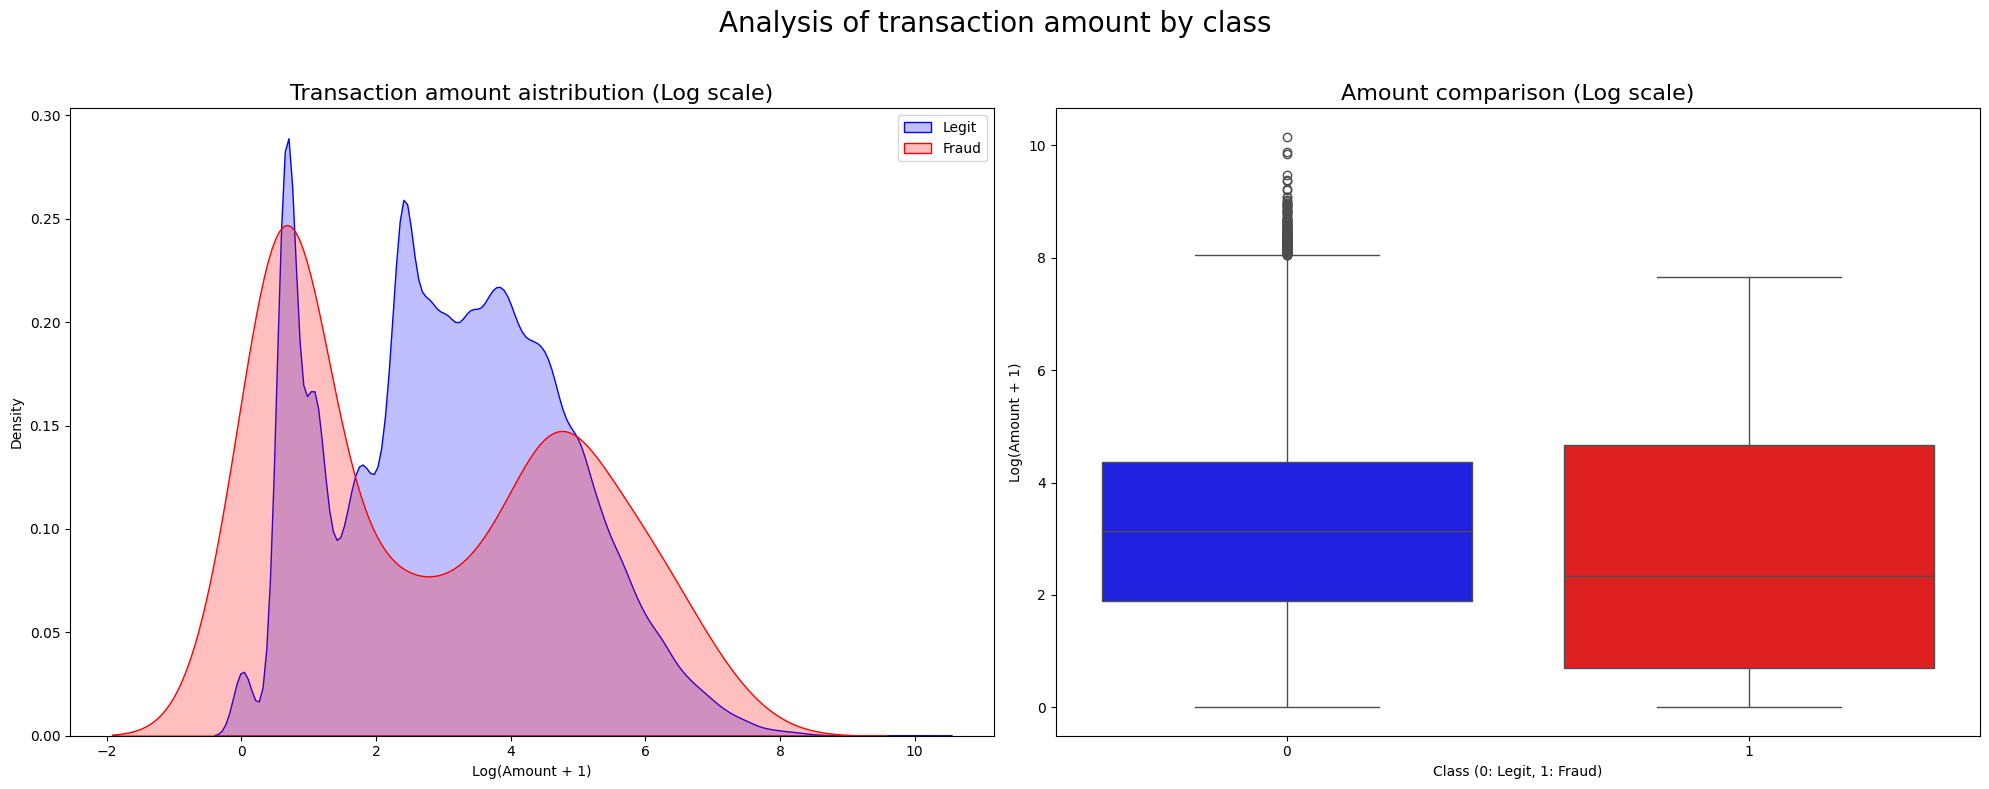

Descriptive statistics for original 'Amount':
          count    mean     std  min   25%    50%     75%       max
Class                                                              
0      284315.0   88.29  250.11  0.0  5.65  22.00   77.05  25691.16
1         492.0  122.21  256.68  0.0  1.00   9.25  105.89   2125.87


In [4]:
# Apply log1p transformation to handle skewness and zero values
df['Amount_log'] = np.log1p(df['Amount'])

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

#KDE Plots of log-transformed Amount
sns.kdeplot(df.loc[df['Class'] == 0, 'Amount_log'], label='Legit', color='blue', fill=True, ax=axes[0])
sns.kdeplot(df.loc[df['Class'] == 1, 'Amount_log'], label='Fraud', color='red', fill=True, ax=axes[0])
axes[0].set_title('Transaction amount aistribution (Log scale)', fontsize=16)
axes[0].set_xlabel('Log(Amount + 1)')
axes[0].set_ylabel('Density')
axes[0].legend()

#Box Plots for direct comparison
sns.boxplot(x='Class', y='Amount_log', data=df, ax=axes[1], palette=['blue', 'red'])
axes[1].set_title('Amount comparison (Log scale)', fontsize=16)
axes[1].set_xlabel('Class (0: Legit, 1: Fraud)')
axes[1].set_ylabel('Log(Amount + 1)')

plt.suptitle('Analysis of transaction amount by class', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#Quantifying the difference in amount
print("Descriptive statistics for original 'Amount':")
print(df.groupby('Class')['Amount'].describe().round(2))


The data reveals the dual tactics of fraudulent spending:

First of all, low-value card use: The median amount for fraudulent transactions ($9.25) is significantly lower than for legitimate ones ($22.00). The density plot shows a sharp peak for fraud at very low values. These are likely small test transactions to see if a stolen card is active.

Moreover, we see polarized spending. Despite the low median, the fraud distribution has a much wider spread. This points to a dual tactic: a high volume of low-value test transactions, followed by a smaller number of high-value "big hits" once the card is validated. 

Now let's analyse the Time feature. Its raw version is just seconds from an arbitrary start. By converting it to the hour of the day, we can check for behavioral patterns.

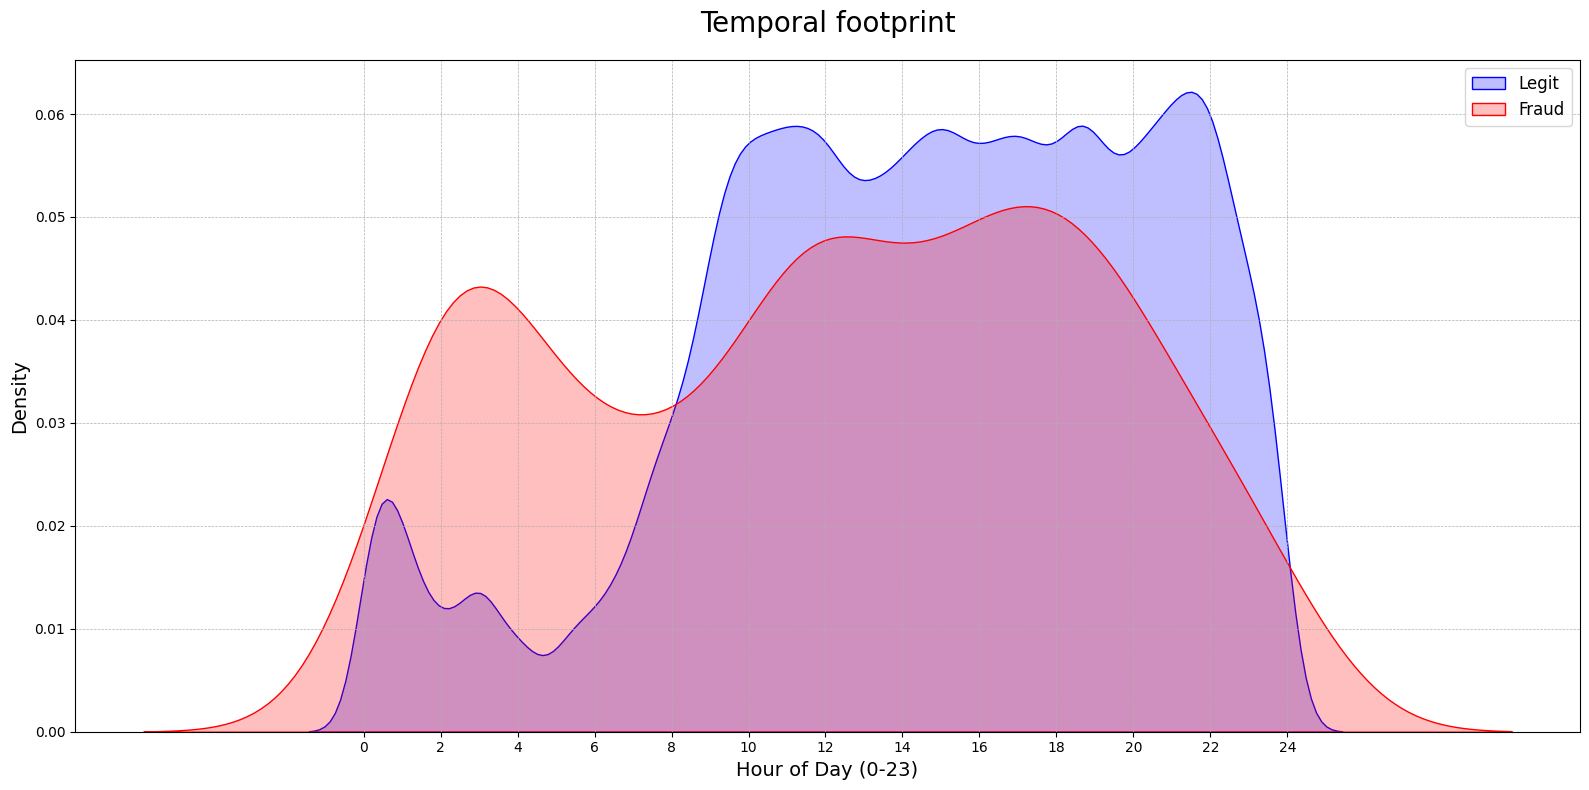

In [6]:

# Build hour feature
df['Hour'] = (df['Time'] / 3600) % 24

#Pre-filtering for efficient plotting
legit_hours = df.loc[df['Class'] == 0, 'Hour']
fraud_hours = df.loc[df['Class'] == 1, 'Hour']

#Visualization using density superposition
fig, ax = plt.subplots(figsize=(16, 8))

sns.kdeplot(legit_hours, ax=ax, label='Legit', color='blue', fill=True)
sns.kdeplot(fraud_hours, ax=ax, label='Fraud', color='red', fill=True)

ax.set_title('Temporal footprint', fontsize=20, pad=20)
ax.set_xlabel('Hour of Day (0-23)', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.set_xticks(range(0, 25, 2))
ax.legend(fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

The graph reveals a divergence in behavior. Legitimate transactions follow a clear circadian rhythm, peaking during daytime hours and dropping sharply overnight. This is the pulse of normal economic activity. In stark contrast, fraud operates on a different clock. Its distribution is far more uniform, with a significant peak during the early morning hours (2-4 AM), precisely when legitimate activity is at its lowest. Fraud is decoupled from normal human behavior. This may be a good predictive signal.

Now that we've analyzed the contextual features, let's investigate the anonymized variables.

There are 28 PCA components that hold the core information for fraud detection. Our goal is to identify which ones are the heavy hitters. A quick visual scan using violin plots will help us spot which features have distinctly different distributions for fraudulent vs. legitimate transactions.

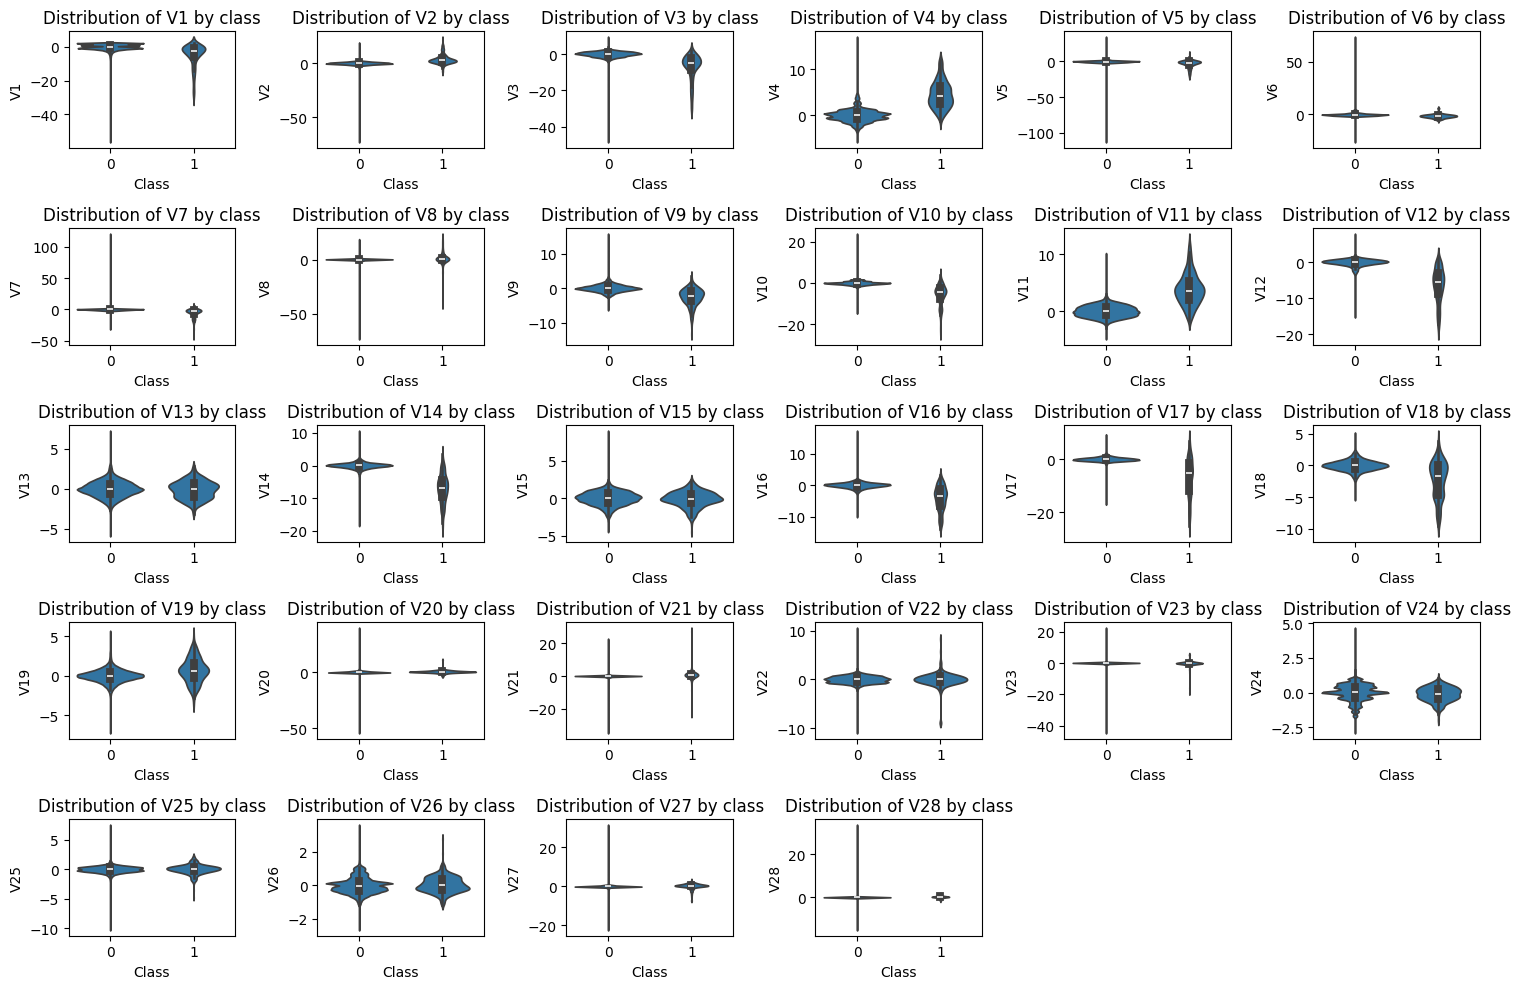

In [7]:
features_v = [f"V{i}" for i in range(1, 29)]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_v, 1):
    plt.subplot(5, 6, i)
    sns.violinplot(x='Class', y=feature, data=df)
    plt.title(f'Distribution of {feature} by class')
plt.tight_layout()
plt.show()

The plots show a clear spectrum of predictive power. Legitime samples tend to be centered around 0, while fraudulent samples tend to deviate in certain features. Some of them, like V14 and V17, show dramatic separation (the shape also may be very different). Others, like V13 and V15, look nearly identical for both classes.
To move beyond eyeballing it, we need to quantify this separation. A standard hypothesis test (like Kolmogorov-Smirnov) isn't the right tool here; with this much data, even tiny, meaningless differences would be flagged as "significant."

A more practical, machine-learning-centric approach is to measure the univariate predictive power of each feature using the ROC AUC score. This will give us a clean, actionable ranking of feature importance.

In [8]:
auc_score = []

for feature in features_v:
    score = roc_auc_score(df['Class'], df[feature])
    auc_score.append({'Feature': feature, 'AUC': score, 'AUC_power': max(score, 1 - score)})

auc_df = pd.DataFrame(auc_score).sort_values(by = 'AUC_power', ascending = False)

print("\nRanking of univariate predictive power of V-Features (AUC):")
print(auc_df)


Ranking of univariate predictive power of V-Features (AUC):
   Feature       AUC  AUC_power
13     V14  0.050840   0.949160
3       V4  0.938258   0.938258
11     V12  0.062960   0.937040
10     V11  0.918083   0.918083
9      V10  0.085943   0.914057
2       V3  0.087927   0.912073
1       V2  0.854955   0.854955
15     V16  0.152869   0.847131
8       V9  0.155910   0.844090
6       V7  0.164188   0.835812
16     V17  0.191805   0.808195
0       V1  0.205094   0.794906
5       V6  0.232995   0.767005
20     V21  0.746375   0.746375
17     V18  0.257586   0.742414
4       V5  0.290430   0.709570
26     V27  0.696805   0.696805
7       V8  0.657842   0.657842
18     V19  0.656731   0.656731
19     V20  0.649972   0.649972
27     V28  0.641929   0.641929
23     V24  0.436131   0.563869
25     V26  0.537999   0.537999
22     V23  0.465125   0.534875
24     V25  0.532548   0.532548
12     V13  0.474604   0.525396
14     V15  0.480252   0.519748
21     V22  0.514477   0.514477


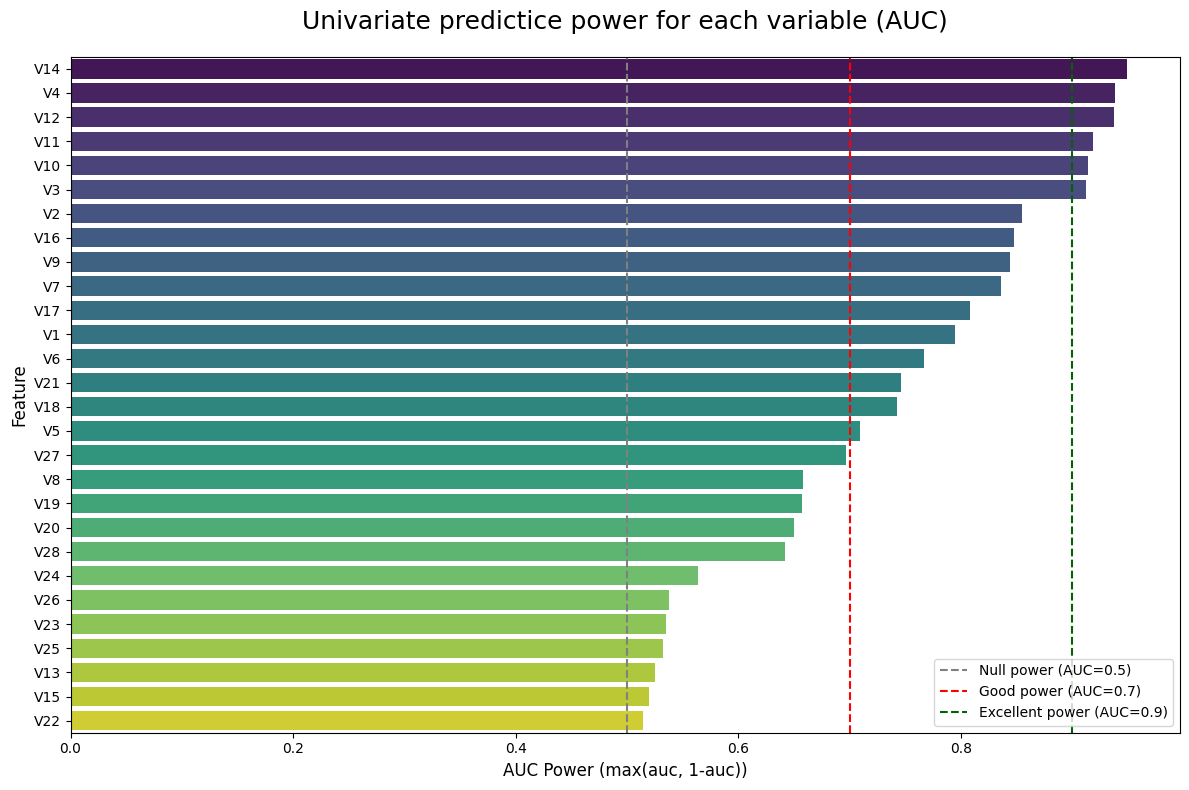

In [9]:
#Plot the power ranking
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='AUC_power', y='Feature', data=auc_df, palette='viridis', ax=ax)
ax.axvline(0.5, ls='--', color='gray', label='Null power (AUC=0.5)')
ax.axvline(0.7, ls='--', color='red', label='Good power (AUC=0.7)')
ax.axvline(0.9, ls='--', color='darkgreen', label='Excellent power (AUC=0.9)')

ax.set_title('Univariate predictice power for each variable (AUC)', fontsize=18, pad=20)
ax.set_xlabel('AUC Power (max(auc, 1-auc))', fontsize=12)
ax.set_ylabel('Feature', fontsize=12)
ax.legend()
plt.tight_layout()
plt.show()

The ranking confirms a clear hierarchy. We have a core group of about 16 features with an AUC power greater than 0.7, which contain the vast majority of the predictive signal. The remaining features likely contribute more noise than value. This is a crucial insight for feature selection later on.

Now that we understand the features individually, let's see how they interact.
A full correlation heatmap would be pointless here. The V1-V28 features are PCA components, which are orthogonal by definition, implying that their linear correlation is zero. A heatmap would just show a near-identity matrix. Instead, we will focus on meaningful interactions.

As a quick sanity check, let's look at the correlations between our non-anonymous features.

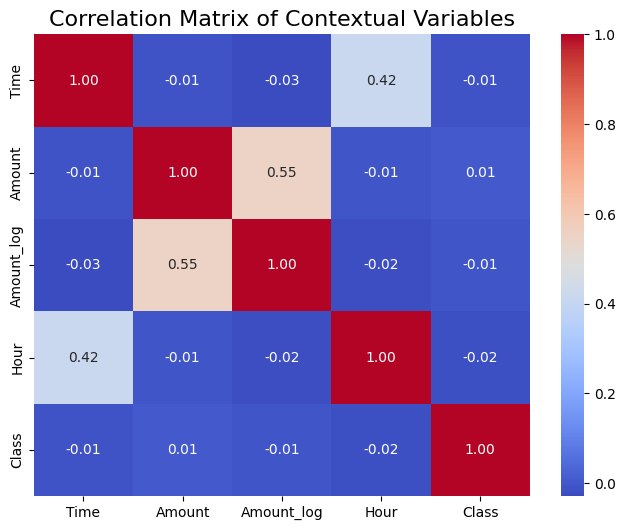

In [10]:
# Select only the interpretable features and the target
cols_of_interest = ['Time', 'Amount', 'Amount_log', 'Hour', 'Class']
focused_corr = df[cols_of_interest].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(focused_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Contextual Variables', fontsize=16)
plt.show()

As expected, there are no strong linear correlations. This reinforces the idea that the predictive relationships here are likely non-linear.

True predictive power often lies in feature interactions. While we can't visualize everything, plotting our top two predictors from the AUC ranking (V14 and V12) against each other can reveal the "footprint" of fraudulent activity.

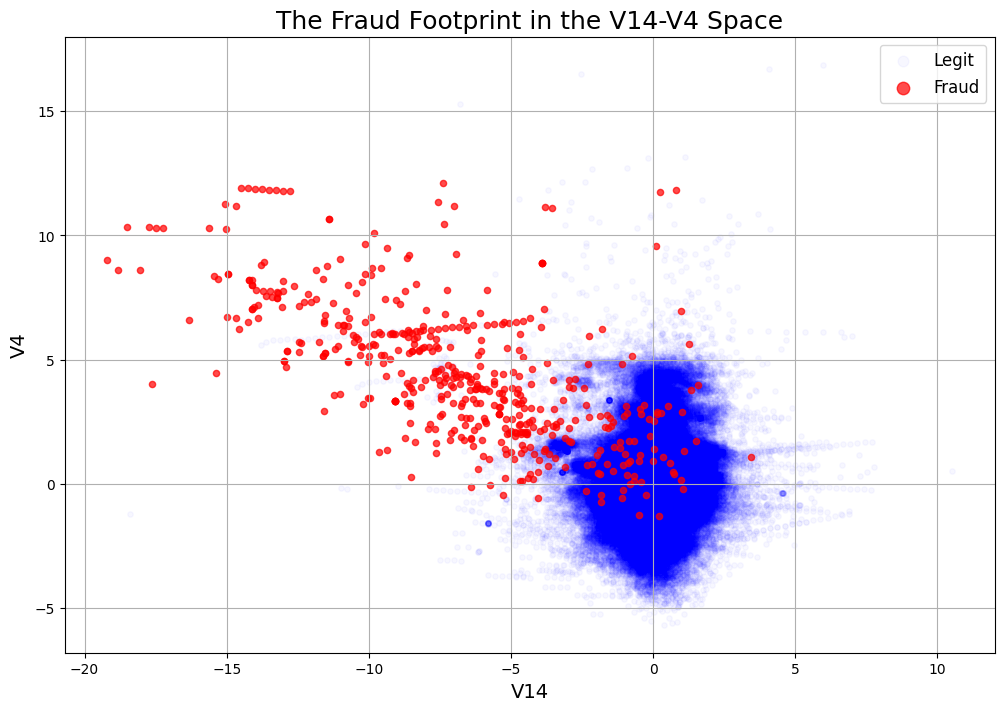

In [11]:
# Select the top two features from our AUC analysis
top_feature_1 = 'V14'
top_feature_2 = 'V4'

# Separate dataframes for a clean visualization of the imbalance
df_legit = df[df['Class'] == 0]
df_fraud = df[df['Class'] == 1]

plt.figure(figsize=(12, 8))

# Plot legitimate transactions as a transparent background
plt.scatter(df_legit[top_feature_1], df_legit[top_feature_2], 
            label='Legit', alpha=0.03, color='blue', s=15)

# Overlay fraudulent transactions to make them stand out
plt.scatter(df_fraud[top_feature_1], df_fraud[top_feature_2], 
            label='Fraud', alpha=0.7, color='red', s=20)

plt.title(f'The Fraud Footprint in the V14-V4 Space', fontsize=18)
plt.xlabel(top_feature_1, fontsize=14)
plt.ylabel(top_feature_2, fontsize=14)
plt.legend(fontsize=12, markerscale=2)
plt.grid(True)
plt.show()

Fraudulent transactions (red dots) are not randomly scattered. They form a dense, clearly separable cluster in a specific region of the feature space.
This is the digital footprint of fraud. The signal isn't just V14 < 0 or V4 > 0; it's the simultaneous combination of both. This is powerful visual evidence that a non-linear model, like a tree-based algorithm, will be very effective at isolating this fraudulent cluster.

## Conclusions of the EDA

Key Insights:

Extreme Imbalance is Central: With fraud cases at just 0.173%, our entire approach must be tailored to this reality, from metrics (AUPRC) to modeling techniques (class weighting).

Fraud Has a Clear Behavioral Footprint:
Temporal: Fraud is decoupled from human rhythms, peaking when legitimate activity is lowest. The Hour feature is critical.
Monetary: Fraudulent spending is polarized, showing a pattern of low-value test transactions and high-value hits.

A Core Group of Features Drives Prediction: We've identified an elite subset of ~16 V features that hold most of the predictive power. This allows for more efficient modeling.
Non-Linearity is Key: The most powerful insight is that fraud exists in separable clusters defined by feature interactions. This strongly indicates that a non-linear, tree-based model is the optimal choice.

Action Plan:
Based on these findings, here is our game plan:
Preprocessing:
Scale Amount and Time (RobustScaler is a good choice due to outliers).
Use a stratified split to ensure class proportions are maintained in the train/test sets.

Modeling:
Primary Model: XGBoost / LightGBM. They are perfectly suited to capture the non-linear interactions we've found and can handle class imbalance natively (scale_pos_weight).
Evaluation Metric: Precision-Recall AUC (AUPRC) will be our north-star metric for performance.

This EDA has given us a clear roadmap. We are now ready to build a high-performance fraud detection model.